<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

In [30]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [31]:
# Start here
#split date from full review

shops['review_date'] = shops["full_review_text"].str[:11]
shops["full_review_text"] = shops["full_review_text"].str[11:]
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating,12/3/2016


In [32]:
#remove "star rating string from star_rating"
shops["star_rating"] = shops["star_rating"].str.slice(0, -12)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [33]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
review_date         object
dtype: object

In [34]:
# to do
# review date need futher cleaning 
# since this is NLP we won't worry about it

In [35]:
shops["star_rating"] = shops["star_rating"].astype(float)
shops.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
review_date          object
dtype: object

In [36]:
#lower case everyting 
shops["full_review_text"] = shops["full_review_text"].apply(lambda x: x.lower())

In [37]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [38]:
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [39]:
shops["tokens"] = shops["full_review_text"].apply(tokenize)
shops["tokens"].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [40]:
shops[["full_review_text", "tokens"]][:5]

,full_review_text,tokens
0,1 check-in love love loved the atmosphere! ev...,"[1, checkin, love, love, loved, the, atmospher..."
1,"listed in date night: austin, ambiance in aust...","[listed, in, date, night, austin, ambiance, in..."
2,1 check-in listed in brunch spots i loved the...,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,very cool decor! good drinks nice seating ho...,"[very, cool, decor, good, drinks, nice, seatin..."
4,1 check-in they are located within the northcr...,"[1, checkin, they, are, located, within, the, ..."


In [41]:
# Object from Base Python
#from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34754),
 ('and', 26650),
 ('a', 22746),
 ('i', 20097),
 ('to', 17163),
 ('of', 12600),
 ('is', 12000),
 ('coffee', 10344),
 ('was', 9705),
 ('in', 9542)]

In [42]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [43]:
wc = count(shops["tokens"])

In [44]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
68,the,6844,34754,1.0,0.044946,0.044946,0.898634
60,and,6864,26650,2.0,0.034466,0.079412,0.901261
10,a,6244,22746,3.0,0.029417,0.108829,0.819853
46,i,5505,20097,4.0,0.025991,0.134820,0.722820
49,to,5653,17163,5.0,0.022196,0.157016,0.742253


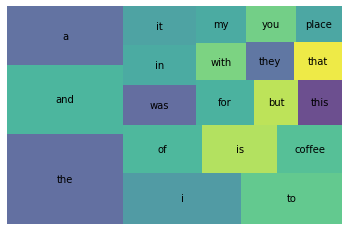

In [45]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [46]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [47]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [48]:
shops["tokens"].head()

0    [ , 1, check-in, love, love, loved, the, atmos...
1    [listed, in, date, night:, austin,, ambiance, ...
2    [ , 1, check-in, listed, in, brunch, spots, i,...
3    [ , very, cool, decor!, good, drinks, nice, se...
4    [1, check-in, they, are, located, within, the,...
Name: tokens, dtype: object

In [49]:
wc = count(shops['tokens'])

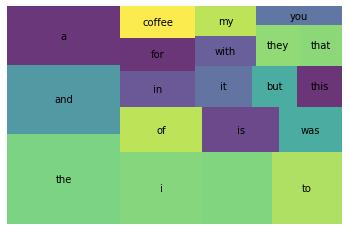

In [50]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [51]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [67]:
STOP_WORDS = nlp.Defaults.stop_words.union(['check-in',"it's", "i'm","i've"])

In [68]:
#with stop words
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [69]:
shops["tokens"].head()

0    [ , 1, love, love, loved, atmosphere!, corner,...
1    [listed, date, night:, austin,, ambiance, aust...
2    [ , 1, listed, brunch, spots, loved, eclectic,...
3    [ , cool, decor!, good, drinks, nice, seating,...
4    [1, located, northcross, mall, shopping, cente...
Name: tokens, dtype: object

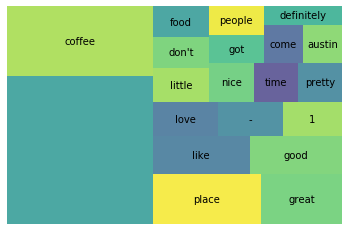

In [70]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [71]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,tokens
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! ev...,5.0,11/25/2016,"[ , 1, love, love, loved, atmosphere!, corner,..."
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,12/2/2016,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the...,4.0,11/30/2016,"[ , 1, listed, brunch, spots, loved, eclectic,..."
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating ho...,2.0,11/25/2016,"[ , cool, decor!, good, drinks, nice, seating,..."
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4.0,12/3/2016,"[1, located, northcross, mall, shopping, cente..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [72]:
#make two data sets for good and bad split using review column

good_shops = shops[shops["star_rating"] >= 4]
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,tokens
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! ev...,5.0,11/25/2016,"[ , 1, love, love, loved, atmosphere!, corner,..."
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,12/2/2016,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the...,4.0,11/30/2016,"[ , 1, listed, brunch, spots, loved, eclectic,..."
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4.0,12/3/2016,"[1, located, northcross, mall, shopping, cente..."
5,The Factory - Cafe With a Soul,1 check-in very cute cafe! i think from the m...,4.0,11/20/2016,"[ , 1, cute, cafe!, think, moment, stepped, in..."


In [73]:
bad_shops = shops[shops["star_rating"] <= 3]
bad_shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,tokens
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating ho...,2.0,11/25/2016,"[ , cool, decor!, good, drinks, nice, seating,..."
8,The Factory - Cafe With a Soul,"1 check-in ok, let's try this approach... pr...",3.0,10/25/2016,"[ , 1, ok,, let's, try, approach..., , pros:,..."
11,The Factory - Cafe With a Soul,"the store has a+ decoration, but honestly, th...",3.0,11/20/2016,"[ , store, a+, decoration,, honestly,, coffee,..."
12,The Factory - Cafe With a Soul,1 check-in listed in 2016 - the third time is...,3.0,11/17/2016,"[ , 1, listed, 2016, -, time, charm!, factory,..."
25,The Factory - Cafe With a Soul,"okay, so after visiting my friends in la and t...",1.0,12/2/2016,"[okay,, visiting, friends, la, trying, mint, m..."


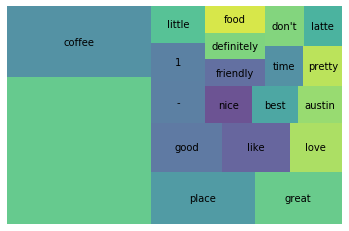

In [74]:
wc = count(good_shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

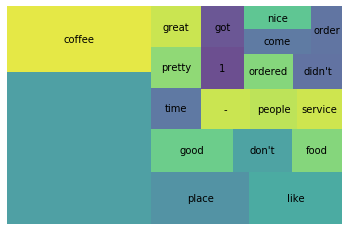

In [75]:
wc = count(bad_shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

